# Machine Learning Engineer Nanodegree
## Capstone Project
Young Kyung Kim  
September 21st, 2019

## I. Definition

### Project Overview
I am going to make a model to predict behavior of customers whether they would be retained or not. This data had been provided by IBM for teaching and data contains information about Telco customers. This kind of data and analysis is important for service provider in deciding marketing strategy to retain their customers. If they know which customers are not likely to be retained, then they could prevent this from happening by giving better offer to those customers. This kind of actions will prevent profit loss. I was personal motivated to investigate this problem because this dataset and problem seemed to be something I will be doing in company as a data scientist. In *Model of Customer Churn Prediction on Support Vector Machine,* Xia and Jin constructed a model to predict which customer will churn or not. It had build a model with support vector machine and talks about how different parameters in support vector machine that affect different metrics. 
<br>
#### Citation
<br>
Zhao, Jing, and Xing-Hua Dang. “Bank Customer Churn Prediction Based on Support Vector Machine: Taking a Commercial Bank's VIP Customer Churn as the Example.” 2008 4th International Conference on Wireless Communications, Networking and Mobile Computing, vol. 28, no. 1, Jan. 2008, pp. 71–77., doi:10.1109/wicom.2008.2509.

### Problem Statement
One of the biggest concerns for many telephone service providers is retaining customers. To retain customers, the providers could provide retention program to current customers but it usually cost a lot of money. If the provider could know which customers will likely to leave, then it could save its cost on retention program by providing the program to them. In another word, identifying the possible leaving customers will increase efficiency for retention program.
My hypothesis is that there will be a model that could predict whether a customer will likely to leave or not.
<br>
Y = f(x)
<br>
Y = Whether customer leaves or not 
<br>
f(x) = prediction model
<br>
<br>
Since this is a classification problem, I will use support vector machine and random forest method to build a model to predict customer's behavior. 

### Metrics
In this section, propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics
should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).
<br>
I will use accuracy score, which is explained in above, as an evaluation metrics.
<br>
<br>
The equation for accuracy score is
<br>
<br>
Acc = (True Positive + True Negative)/ (True Positive + False Positive + False Negative + True Negative)
<br>
<br>
True Positive = Whether the model had correctly predicted positive value
<br>
False Positive = When the model had predicted negatively when actual value is positive
<br>
True Negative = Whether the model had correctly predicted negative value
<br>
False Negative = Whether the model had predicted positively when actual value is negative
<br>
<br>
There are other metrics I should consider as recall and precision. Recall represents how well the model have predicted customer leaving among who actually left. Precision represents how well the model have predited customer leaving among who they predicted will leave. Below is the equations for each metrics
<br>
<br>
The equation for recall is
<br>
Recall = True Positive / (True Positive + False Negative)
<br>
<br>
The equation for precision is
<br>
Recall = True Positive / (True Positive + True Negative)
<br>
<br>
We should consider strengths of recall and precision in given problem before choosing one of the metrics. Let's assume that Telecom are going to send people, who are predicted to leave, an e-mail advertisement, which doesn't cost much. In this case, if we do not focus on recall, then we might miss some people actually leaving. This mistake will cost a lot to the company. However, if we do not focus on precision, then we might mistakenly send e-mail advertisement to people, who are not actually leaving. This mistake will not cost much. Therefore, I will consider recall as another metrics over precision. 


## II. Analysis

### Data Exploration

In [15]:
import numpy as np
import pandas as pd
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print (data.shape)
display(data.head(n=8))
data.isnull().sum()
### Change empty string into value 0 for TotalCharges variables
data['TotalCharges'].values[data['TotalCharges'].values== " "] =0
data['TotalCharges'] = data['TotalCharges'].values.astype(np.float)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


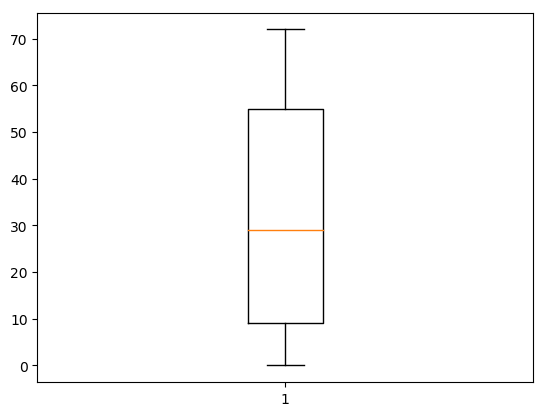

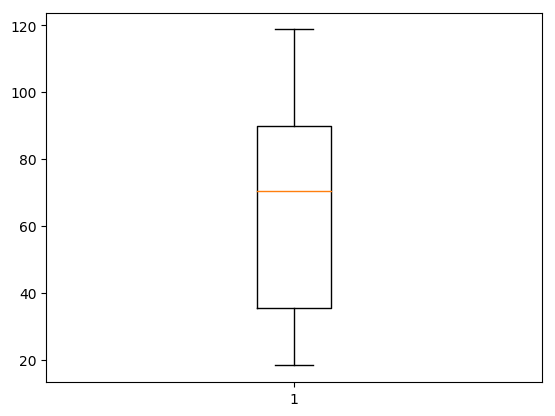

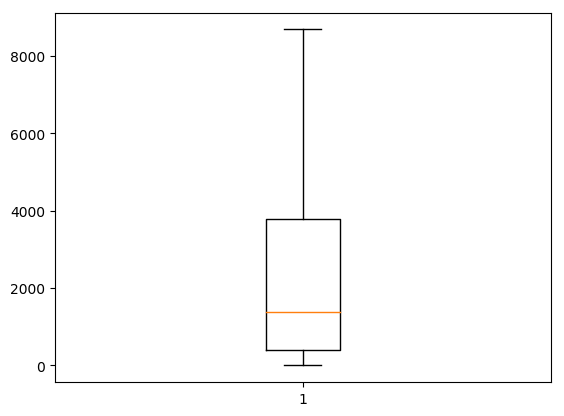

In [16]:
#plt.boxplot(data['tenure'].values)
import matplotlib.pyplot as plt
plt.figure()
plt.boxplot(data['tenure'].values, 0, 'gD')
plt.show()

plt.figure()
plt.boxplot(data['MonthlyCharges'].values, 0, 'gD')
plt.show()

plt.figure()
plt.boxplot(data['TotalCharges'].values, 0, 'gD')
plt.show()

For this project, I will use dataset provided by IBM and Telco, which could accessed in the Kaggle(https://www.kaggle.com/blastchar/telco-customer-churn/home). The dataset contains information on whether customer leaving the service, what kind of services that customer has sign up for, customer’s account information and customer’s demographic information. For what kind of services that customer has sign up for, the data contains information whether they have signed up for phone or internet services. These kinds of information could be important. For example, customer who signed up for phone could have higher chance of leaving compared to customer who signed up for internet. Such information will be helpful for predicting whether customers will leave or not.
<br>
<br>
Similar to what kind of services that customer has sign up for, customer’s account information could be important. Whether contract is monthly or yearly based could influence whether customers will leave or not. Also, customer’s demographic whether they are married or not could influence a lot in predicting whether customers will leave or not. Even though it is not clear which kind of data would relevant in this project, it is our job to find out through exploration and testing.
<br>
<br>
Given dataset has 7043 inputs with 21 variables. The dataset do not have any missing values but it had some empty string as the values. I have converted those empty string into 0. Dataset has various categorical variables. I am planning to change all those categorical variables into dummy variables. There are 3 numerical variables but from looking at boxplot none of them seems to have outliers. Yet, from looking at their boxplot it seems they might have distribution problem. It seems like the distribution is skewed right for all three features. Three features may need a normalization and I will explore the distribution futher in next section. 
<br>
Below are list of variables in the dataset:
<br>
- "customerIDCustomer": ID
- "genderCustomer gender": (female, male)
- "SeniorCitizenWhether": the customer is a senior citizen or not (1, 0)
- "PartnerWhether": the customer has a partner or not (Yes, No)
- "DependentsWhether": the customer has dependents or not (Yes, No)
- "tenureNumber": of months the customer has stayed with the company
- "PhoneServiceWhether" the customer has a phone service or not (Yes, No)
- "MultipleLinesWhether" the customer has multiple lines or not (Yes, No, No phone service)
- "InternetServiceCustomer’s": internet service provider (DSL, Fiber optic, No)
- "OnlineSecurityWhether": the customer has online security or not (Yes, No, No internet service)
- "OnlineBackupWhether": the customer has online backup or not (Yes, No, No internet service)
- "DeviceProtectionWhether": the customer has device protection or not (Yes, No, No internet service)
- "TechSupportWhether": the customer has tech support or not (Yes, No, No internet service)
- "StreamingTVWhether": the customer has streaming TV or not (Yes, No, No internet service)
- "StreamingMoviesWhether": the customer has streaming movies or not (Yes, No, No internet service)
- "ContractThe": contract term of the customer (Month-to-month, One year, Two year)
- "PaperlessBillingWhether": the customer has paperless billing or not (Yes, No)
- "PaymentMethodThe customer’s": payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- "MonthlyChargesThe": amount charged to the customer monthly
- "TotalChargesThe": total amount charged to the customer
- "ChurnWhether": the customer churned or not (Yes or No)
<br>

### Exploratory Visualization

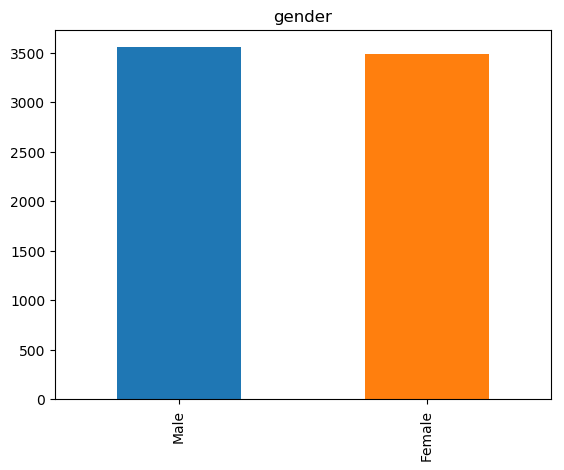

In [17]:
data['gender'].value_counts().plot(kind='bar', title = "gender")


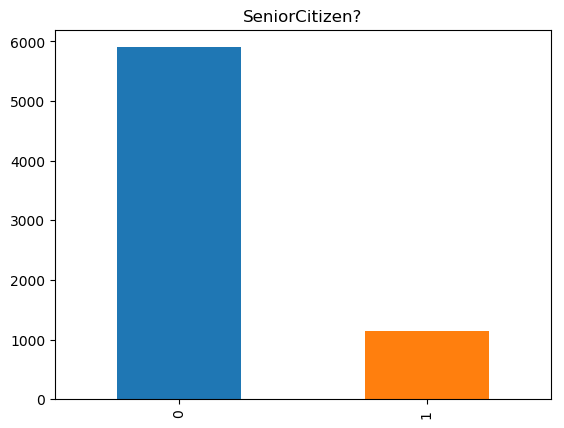

In [18]:
data['SeniorCitizen'].value_counts().plot(kind='bar', title = "SeniorCitizen?")

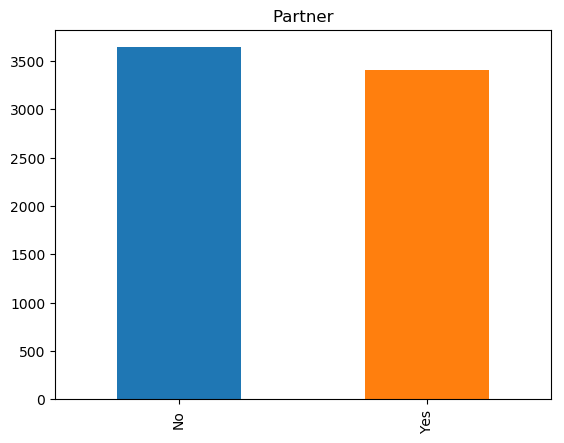

In [19]:
data['Partner'].value_counts().plot(kind='bar', title = "Partner")

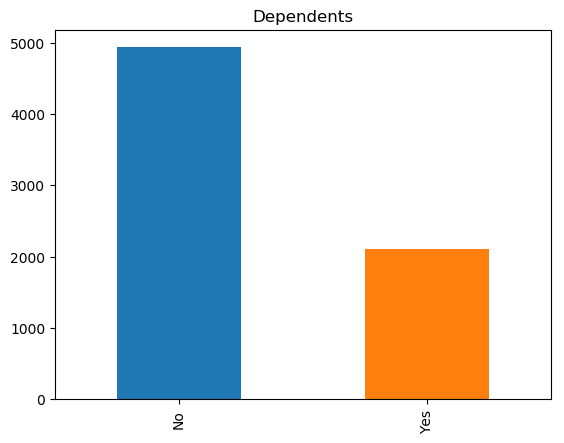

In [20]:
data['Dependents'].value_counts().plot(kind='bar', title = "Dependents")

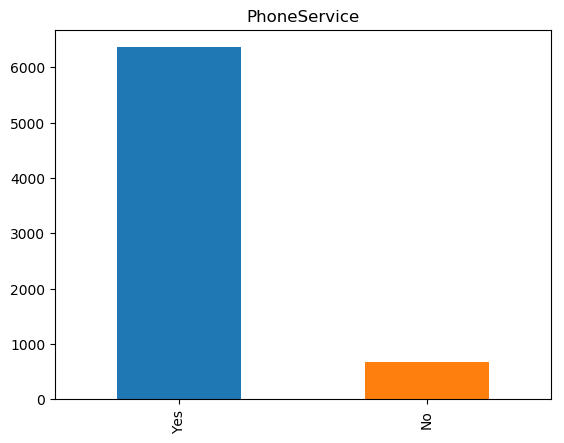

In [21]:
data['PhoneService'].value_counts().plot(kind='bar', title = "PhoneService")

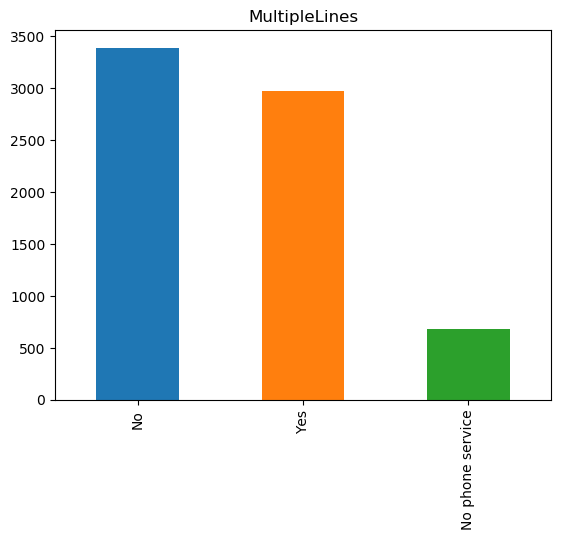

In [22]:
data['MultipleLines'].value_counts().plot(kind='bar', title ="MultipleLines")

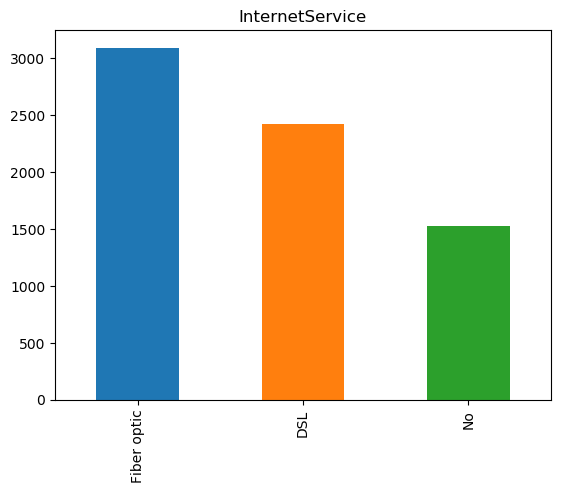

In [23]:
data['InternetService'].value_counts().plot(kind='bar', title ="InternetService")

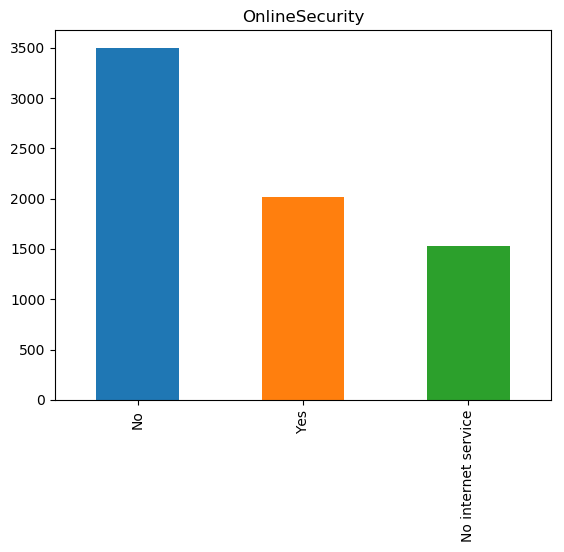

In [24]:
data['OnlineSecurity'].value_counts().plot(kind='bar', title ="OnlineSecurity")

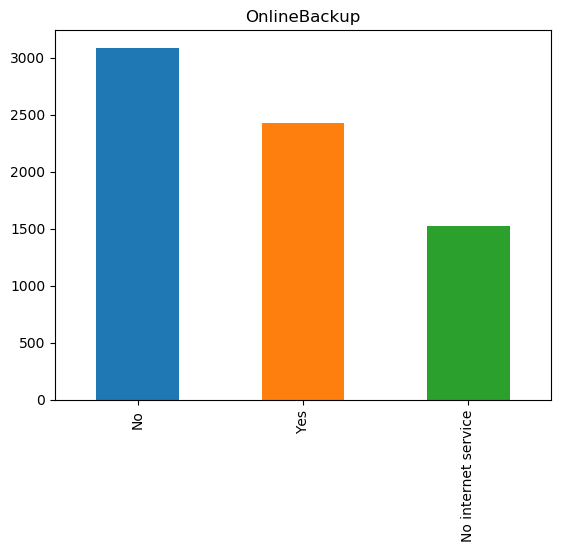

In [25]:
data['OnlineBackup'].value_counts().plot(kind='bar', title ="OnlineBackup")

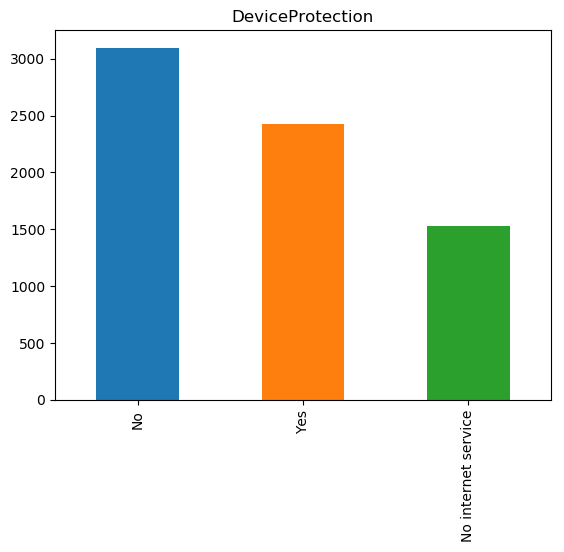

In [26]:
data['DeviceProtection'].value_counts().plot(kind='bar', title ="DeviceProtection")

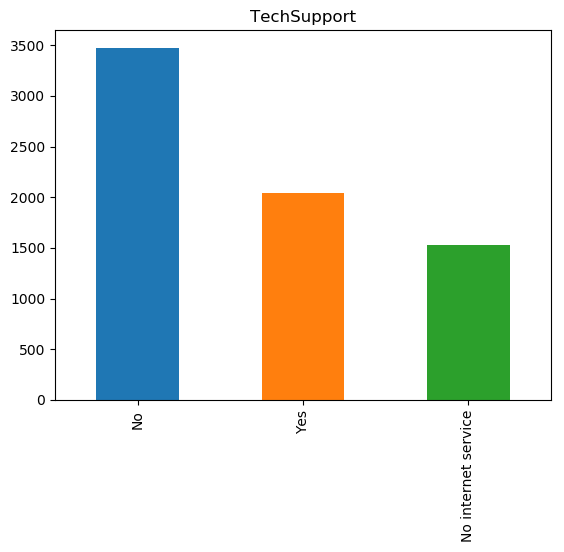

In [27]:
data['TechSupport'].value_counts().plot(kind='bar', title ="TechSupport")

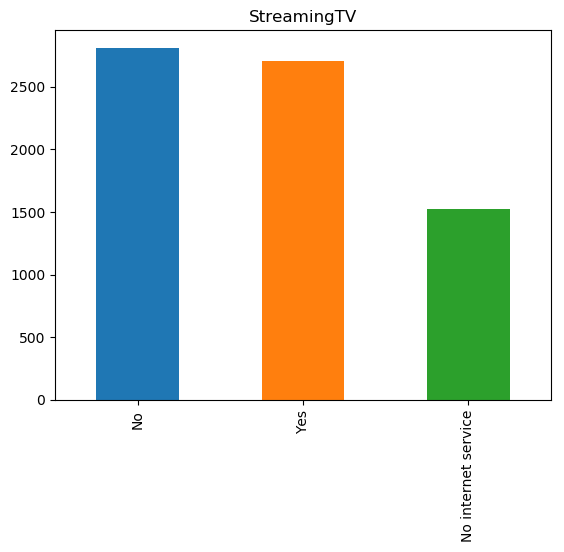

In [28]:
data['StreamingTV'].value_counts().plot(kind='bar', title ="StreamingTV")

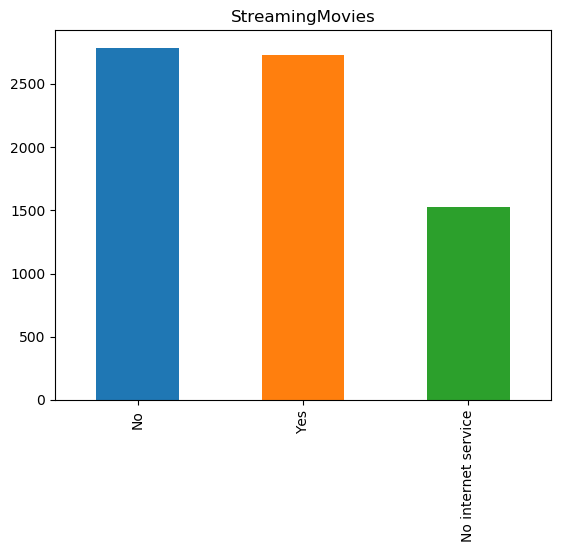

In [29]:
data['StreamingMovies'].value_counts().plot(kind='bar', title ="StreamingMovies")

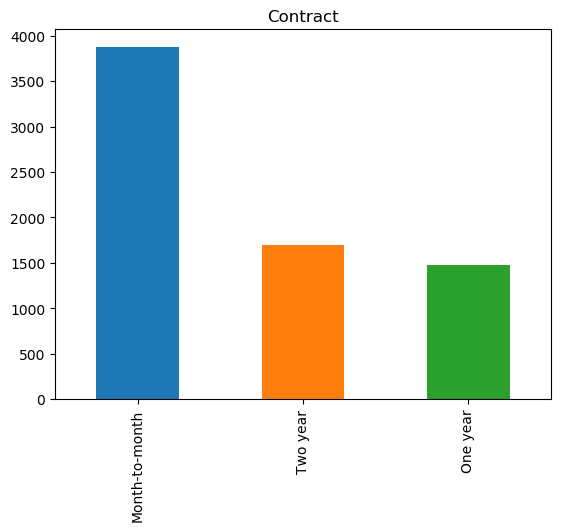

In [30]:
data['Contract'].value_counts().plot(kind='bar', title ="Contract")

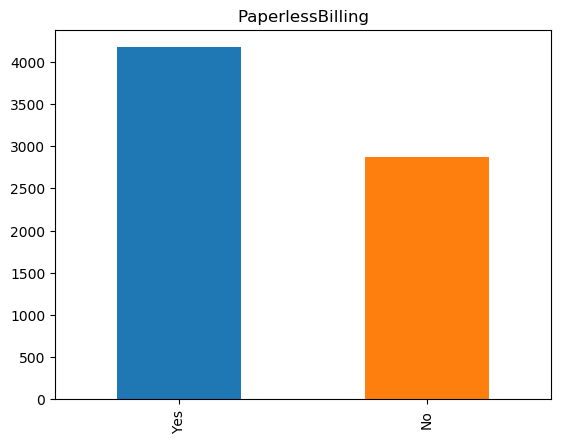

In [31]:
data['PaperlessBilling'].value_counts().plot(kind='bar', title ="PaperlessBilling")

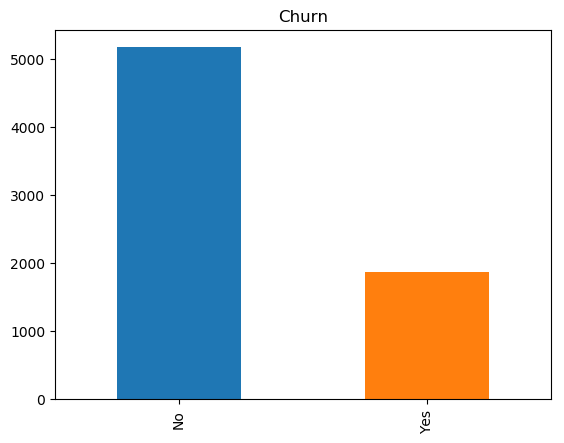

In [32]:
data['Churn'].value_counts().plot(kind='bar', title ="Churn")

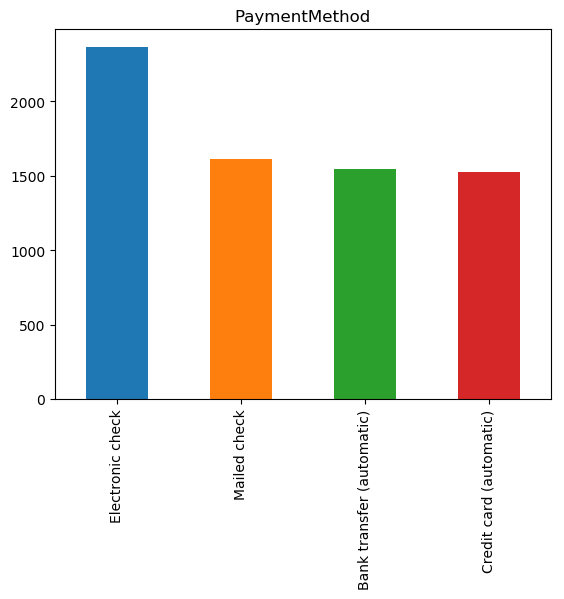

In [33]:
data['PaymentMethod'].value_counts().plot(kind='bar', title ="PaymentMethod")

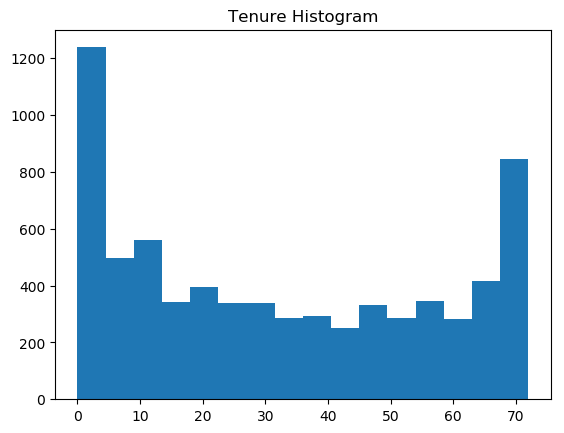

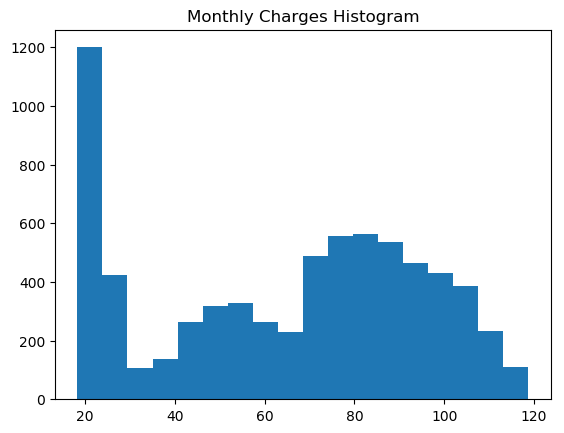

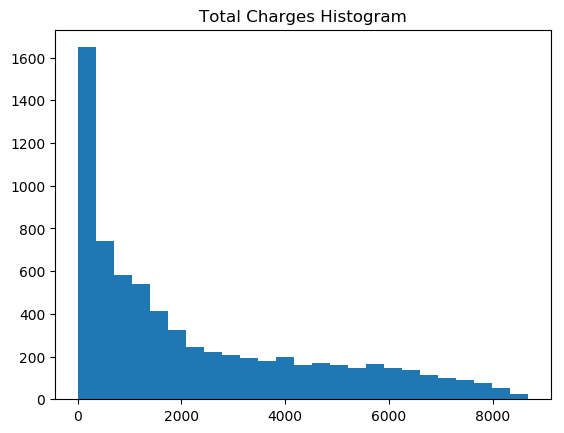

In [34]:
import seaborn as sns
sns.reset_orig()
plt.hist(data['tenure'].values,bins='auto')
plt.title("Tenure Histogram")
plt.show()
plt.hist(data['MonthlyCharges'].values,bins='auto')
plt.title("Monthly Charges Histogram")
plt.show()
plt.hist(data['TotalCharges'].values,bins='auto')
plt.title("Total Charges Histogram")
plt.show()

Most of categorical variables has at least 1,000 data points for each level, except for Phone Service and Multipe Line Variable. We should take account that maybe we might have too little data points for no level of Phone Service to represent the population for people, who don't have phone service. All the continuous variable do not have normal distribution. For Tenure variable distrubtion, it seems to be bimodal with two peak on 0 and 70. For Monthy Charges and Total Charges Histogram, it seems to be skewed right. However, both SVM and Random Forest technique do not require normal distribution but I will still normalize the data as model might give some features more importance over other features. 

### Algorithms and Techniques

Since dataset has output variable, which is Churn, I am going to use supervised learning instead of unsupervised learning. Also as output variable is categorical variable, I will use support vector machine and random forest to build a model. 
<br>
#### Support Vector Machine
With given training data, support vector machine will find the optimized equation for a given function to classify training data. It will find the optimized equation through calculating and comparing score for different equations for the given function. For example, support vector machine will give negative points to misclassification of data points and give positive points to larger margin. Support Vector Machine will choose a equation that has highest total points. It is possible to change how support vector machine calculate points. For example, we could change how much support vector machine will give negative points to misclassification. We could set support vector machine to give large negative points to misclassification to find best equation to classify training data. Yet, this will cause overfitting, so it is important to try different negative points to misclassification to find the best one. Furthermore, we could try different function for classification. We could use linear or radial basis function to seperate two classes of data. 

<br>
The following parameters could be tuned for optimization in support vector machine:
<br>
<br>
- Penalty: How much to give penalty for making mistake.
<br>
- Kernel: Method or equation to seperate two classification. (linear, polynomial,radial basis function, etc.)
<br>
- Degree: How many degree for polynomial kernel function.
<br>
<br>

#### Random Forest
Random forest is a combination of different decision trees that had been derived from the training data. Random forst will randomly choose data points and features to build decision trees. These decision trees will be combined to make one model. One of the advantage that random forest have over decision tree, especially that has large depth, is that it less prone to overfitting as it will consider different decision trees. Just like support vector machine, we could change how random forest work. For example, we could choose how many tress to construct before combining them. We could also set how many features to use in building individual tree. 
<br>

The following parameters could be tuned for optimization in random forest:
<br>
<br>
- Number of estimators: How many trees to construct.
<br>
- Criterion: Which technique to use to split data.
<br>
- Max_features: How many features to use build a model.
<br>
- Max_depth: Maxium depth of nodes
<br>
- min_samples_leaf: Minimum number of samples required to be at a leaf node.
<br>
<br>

For both model, I am first going to preprocess data for training. Then I will set variables for Grid Search, which will help me to find the best parameter values for each model.
<br>

I will compare the result and choose the best one.






### Benchmark

Since this data has been posted on Kaggle, there are a lot of model posted online. One of the posted model used various methods to solve the problem. For example, it used regression and random forest. It achieved about 70% of accuracy score. The equation for accuracy score is
Acc = (True Positive + True Negative)/ (True Positive + False Positive + False Negative + True Negative)
True Positive = Whether the model had correctly predicted positive value
False Positive = When the model had predicted negatively when actual value is positive True Negative = Whether the model had correctly predicted negative value
False Negative = Whether the model had predicted positively when actual value is negative

## III. Methodology


### Data Preprocessing

- I will normalize the continuous variable as model might give some features more importance over other features. Looking at below diagram, we could notice that value has normalized. 
- I have replaced binary variable(yes or no) into 1 for yes and 0 for no. 
- For categorical variables that can take more than two values, I have made dummies variables for them. Looking at below diagram, we could notice the dummy variables being created. 
- I have also divided the dataset into training and test set with the ratio of 8:2. 5634 samples have been assigned to training set and 1409 samples have been assigned to test set.
- Correlated features do not affect accuracy of classification accuracy, so I didn't conduct feature selections.  

/Users/youngkyungkim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


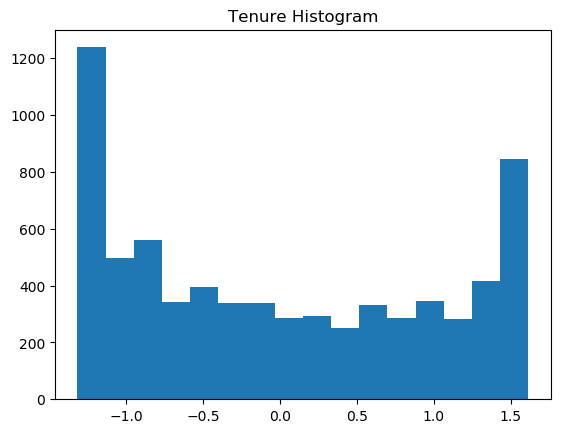

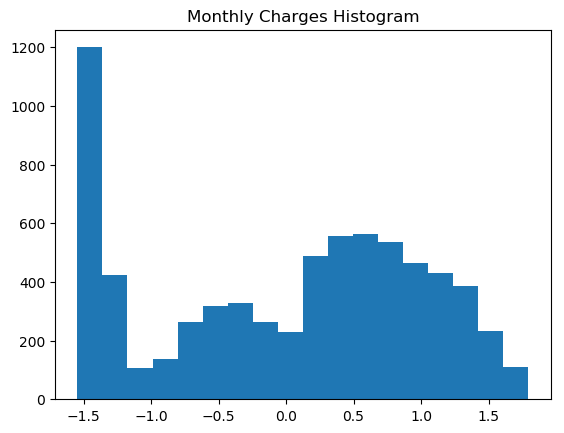

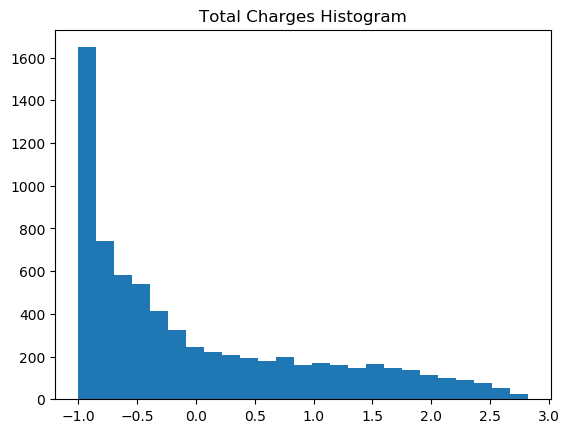

In [35]:
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer

Tenure_norm = preprocessing.scale(data['tenure'].values)
data['tenure'] = Tenure_norm 

MonthlyCharges_norm = preprocessing.scale(data['MonthlyCharges'].values)
data['MonthlyCharges'] = MonthlyCharges_norm 

TotalCharges_norm = preprocessing.scale(data['TotalCharges'].values)
data['TotalCharges'] = TotalCharges_norm 

plt.hist(data['tenure'].values,bins='auto')
plt.title("Tenure Histogram")
plt.show()
plt.hist(data['MonthlyCharges'].values,bins='auto')
plt.title("Monthly Charges Histogram")
plt.show()
plt.hist(data['TotalCharges'].values,bins='auto')
plt.title("Total Charges Histogram")
plt.show()


In [36]:
data_var = data.rename(index=str, columns={"gender": "male"})
data_var['male'] = data_var['male'].replace({'Male': 1,'Female': 0})
list_replace = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for variable in list_replace:
    data_var[variable] = data_var[variable].replace({'Yes': 1,'No': 0})
    

add_dummies = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection','OnlineBackup', 'TechSupport','StreamingTV',
               'StreamingMovies','Contract','PaymentMethod']
data_dummies = pd.get_dummies(data_var, columns = add_dummies)
print (data_dummies.head(n=5))

   customerID  male  SeniorCitizen  Partner  Dependents    tenure  \
0  7590-VHVEG     0              0        1           0 -1.277445   
1  5575-GNVDE     1              0        0           0  0.066327   
2  3668-QPYBK     1              0        0           0 -1.236724   
3  7795-CFOCW     1              0        0           0  0.514251   
4  9237-HQITU     0              0        0           0 -1.236724   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
0             0                 1       -1.160323     -0.992611   
1             1                 0       -0.259629     -0.172165   
2             1                 1       -0.362660     -0.958066   
3             0                 0       -0.746535     -0.193672   
4             1                 1        0.197365     -0.938874   

              ...              StreamingMovies_No  \
0             ...                               1   
1             ...                               1   
2             ...      

In [37]:
from sklearn.model_selection import train_test_split
y = data_dummies['Churn']
X = data_dummies.drop(['Churn','customerID'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print ("Training set has "+str(X_train.shape[0])+" samples with "+str(X_train.shape[1])+" variables")
print ("Test set has "+str(X_test.shape[0])+" samples with "+str(X_test.shape[1])+" variables")

Training set has 5634 samples with 40 variables
Test set has 1409 samples with 40 variables


### Implementation
#### Support Vector Machine
1. Load data.
2. Preprocess the data as above.
3. Create Support Vector Machine with default value.
<br>
    - Penalty: 1
<br>
    - Kernel: 'rbf(radial basis function)'
<br>
    - Gamma: 'auto'
<br>
4. Insert preprocessed training dataset into Support Vector Machine to train. 
5. Predict classification of test dataset through inseting test dataset into trained model. 
6. With the prediction, calculate acuracy and recall score through comparing to real outcome.
- Got accuracy score of 81.41%.
- Got recall score of 51.74%


In [167]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
SVM = SVC(random_state = 23)
SVM_model = SVM.fit(X_train, y_train)
s_predictions = SVM_model.predict(X_test)
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, s_predictions)))
print("Recall score on testing data: {:.4f}".format(recall_score(y_test, s_predictions)))
print (SVM.get_params)

Accuracy score on testing data: 0.8141
Recall score on testing data: 0.5174
<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=23, shrinking=True,
  tol=0.001, verbose=False)>


#### Random Forest
1. Load data.
2. Preprocess the data as above.
3. Create Random Forest with default value.
<br>
    - Number of estimators: 10
<br>
    - Criterion: 'gini'
<br>
    - Max_features: 'auto'
<br>
    - Max_depth: 'None'
<br>
    - min_samples_leaf: 'None'
<br>
4. Insert preprocessed training dataset into Support Vector Machine to train. 
5. Predict classification of test dataset through inseting test dataset into trained model. 
6. With the prediction, calculate acuracy and recall score through comparing to real outcome.
- Got accuracy score of 78.35%.
- Got recall score of 42.9%

In [168]:
from sklearn.ensemble import RandomForestClassifier

Tree = RandomForestClassifier(random_state=23)
r_predictions = (Tree.fit(X_train, y_train)).predict(X_test)
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, r_predictions)))
print("Recall score on testing data: {:.4f}".format(recall_score(y_test, r_predictions)))
print (Tree.get_params)

Accuracy score on testing data: 0.7835
Recall score on testing data: 0.4290
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False)>


### Refinement
In order to increase accuracy score and recall score, I have used Grid Search technique. First I have set list of parameters to test for each algorithm, which are listed below. 
<br>
##### Parameters for Support Vector Machine: 
    - Penalty: [0.1,0.5,1,1.5,2]
    - Kernel: ['linear', 'poly', 'rbf', 'sigmoid']
    - Degree: [3,4,5,6,7,8,9]
    - Gamma: ['auto',0.03,0.05,0.75,0.1]
##### Parameters for Random Forest: 
    - Number of estimators: [5,10,15,20,25,30]
    - Criterion: ['gini', 'entropy']
    - Max_features: [5,10,15,20,30,35]
    - Max_depth: [5,10,15,20]
    - min_samples_leaf: [2,5,10,15]
    
I have set accuracy score as metric for the Grid Search. 
<br>
Grid Search technique is going through all given parameters into the model to find the parameter with best accuracy score and recall. After finding the best parameters it will save those parameters. These parameters and accuracy score and recall score are listed below.  


- Support Vector Machine with accuracy score as scoring method.
<br>
    - Penalty: 2
<br>
    - Kernel: 'rbf(radial basis function)'
<br>
    - Gamma: 0.05
<br>

In [179]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

SVM = SVC(random_state = 23)


parameters = {'C': [0.1,0.5,1,1.5,2], 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[3,4,5,6,7,8,9], 'gamma':[0.01,0.02,0.025,0.03,0.05]}

scorer = make_scorer(accuracy_score)
grid = GridSearchCV(SVM, parameters, scorer)
grid_model_SVM = grid.fit(X_train, y_train)


best_SVM = grid_model_SVM.best_estimator_
SVM_predictions = best_SVM.predict(X_test)

print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, SVM_predictions)))
print (best_SVM.get_params)

Accuracy score on the testing data: 0.8141
<bound method BaseEstimator.get_params of SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=23, shrinking=True,
  tol=0.001, verbose=False)>


- Support Vector Machine with recall score as scoring method.
<br>
    - Penalty: 1.5
<br>
    - Kernel: 'sigmoid'
<br>
    - Gamma: 0.025
<br>

In [177]:
SVM = SVC(random_state = 23)


parameters = {'C': [0.1,0.5,1,1.5,2], 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[3,4,5,6,7,8,9], 'gamma':[0.01,0.02,0.025,0.03,0.05]}

scorer = make_scorer(recall_score)
grid_recall = GridSearchCV(SVM, parameters, scorer)
grid_model_SVM_recall = grid_recall.fit(X_train, y_train)


best_SVM_recall = grid_model_SVM_recall.best_estimator_
SVM_predictions_recall = best_SVM_recall.predict(X_test)

print("recall score on the testing data: {:.4f}".format(recall_score(y_test, SVM_predictions_recall)))
print (best_SVM_recall.get_params)

recall score on the testing data: 0.6193
<bound method BaseEstimator.get_params of SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.025, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=23, shrinking=True,
  tol=0.001, verbose=False)>


- Random Forest with accuracy score as scoring method.
<br>
    - Number of estimators: 15
<br>
    - Criterion: 'entrophy'
<br>
    - Max_features: 5
<br>
    - Max_depth: 10
<br>
    - min_samples_leaf: 1
<br>

In [133]:
Tree = RandomForestClassifier(random_state=23)

parameters = {'n_estimators': [5,10,15,20,25,30], 'criterion':['gini', 'entropy'], 'max_features':[5,10,15,20,30,35], 
              'max_depth':[5,10,15,20], 'min_samples_split':[2,5,10,15]}

scorer = make_scorer(accuracy_score)
grid = GridSearchCV(Tree, parameters, scorer)
grid_model_Tree = grid.fit(X_train, y_train)


best_Tree = grid_model_Tree.best_estimator_
Tree_predictions = best_Tree.predict(X_test)

print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, Tree_predictions)))
print (best_Tree.get_params)

Accuracy score on the testing data: 0.8062
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False)>


- Random Forest with recall score as scoring method.
<br>
    - Number of estimators: 15
<br>
    - Criterion: 'entrophy'
<br>
    - Max_features: 15
<br>
    - Max_depth: 10
<br>
    - min_samples_leaf: 1
<br>

In [178]:
Tree = RandomForestClassifier(random_state=23)

parameters = {'n_estimators': [5,10,15,20,25,30], 'criterion':['gini', 'entropy'], 'max_features':[5,10,15,20,30,35], 
              'max_depth':[5,10,15,20], 'min_samples_split':[2,5,10,15]}

scorer = make_scorer(recall_score)
grid_recall = GridSearchCV(Tree, parameters, scorer)
grid_model_Tree_recall = grid_recall.fit(X_train, y_train)


best_Tree_recall = grid_model_Tree_recall.best_estimator_
Tree_predictions_recall = best_Tree_recall.predict(X_test)

print("Recall score on the testing data: {:.4f}".format(recall_score(y_test, Tree_predictions_recall)))
print (best_Tree_recall.get_params)

Recall score on the testing data: 0.5550
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False)>


## IV. Results

### Model Evaluation and Validation

#### Result from Grid Search (scoring method: accuracy score)
##### Support Vector Machine
Accuracy score: 81.41%
<br>
Recall score: 52.82%
##### Parameter for optimized Support Vector Machine
    - Penalty: 2
    - Kernel: 'rbf(radial basis function)'
    - Gamma: 0.05
    
##### Random Forest
Accuracy score: 80.62%
<br>
Recall score: 53.35
##### Parameter for optimized Random Forest
    - Number of estimators: 15
    - Criterion: 'entropy'
    - Max_features: 5
    - Max_depth: 10
    - min_samples_leaf: 1
    
#### Result from Grid Search (scoring method: recall score)
##### Support Vector Machine
Accuracy score: 80.77%
<br>
Recall score: 61.93%
##### Parameter for optimized Support Vector Machine
    - Penalty: 1.5
    - Kernel: 'sigmoid'
    - Gamma: 0.025
##### Random Forest
Accuracy score: 80.62%
<br>
Recall score: 55.5%
##### Parameter for optimized Random Forest
    - Number of estimators: 15
    - Criterion: 'entropy'
    - Max_features: 15
    - Max_depth: 10
    - min_samples_leaf: 1

From comparing accuracy score and recall score SVM is better method in prediction compared to Random Forest. Among two SVM model, I am going to choose SVM that has been optimized with recall score. It has 9% higher score in recall score while less than 1% lower score in accuracy score compared to another SVM model. As mention in above, if advertisement doesn't cost much, then identifying person who will leave will be more important than identifying person who will not leave. In that sense, recall score will be important to company profit. Thus I will choose SVM that has been optimized with recall score as the final model. 


In [182]:
print("Accuracy score on the testing data for SVM with scoring method as accuracy score: {:.4f}".format(accuracy_score(y_test, SVM_predictions)))
print("Recall score on the testing data for SVM with scoring method as accuracy score: {:.4f}".format(recall_score(y_test, SVM_predictions)))
print("Accuracy score on the testing data for SVM with scoring method as recall score: {:.4f}".format(accuracy_score(y_test, SVM_predictions_recall)))
print("Recall score on the testing data for SVM with scoring method as recall score: {:.4f}".format(recall_score(y_test, SVM_predictions_recall)))
print("Accuracy score on the testing data for Tree with scoring method as accuracy score: {:.4f}".format(accuracy_score(y_test, Tree_predictions)))
print("Recall score on the testing data for Tree with scoring method as accuracy score: {:.4f}".format(recall_score(y_test, Tree_predictions)))
print("Accuracy score on the testing data for Tree with scoring method as recall score: {:.4f}".format(accuracy_score(y_test, Tree_predictions_recall)))
print("Recall score on the testing data for Tree with scoring method as recall score: {:.4f}".format(recall_score(y_test, Tree_predictions_recall)))

Accuracy score on the testing data for SVM with scoring method as accuracy score: 0.8141
Recall score on the testing data for SVM with scoring method as accuracy score: 0.5282
Accuracy score on the testing data for SVM with scoring method as recall score: 0.8077
Recall score on the testing data for SVM with scoring method as recall score: 0.6193
Accuracy score on the testing data for Tree with scoring method as accuracy score: 0.8062
Recall score on the testing data for Tree with scoring method as accuracy score: 0.5335
Accuracy score on the testing data for Tree with scoring method as recall score: 0.8062
Recall score on the testing data for Tree with scoring method as recall score: 0.5550


#### Robustness
In order to check robustness, I have randomly seperated data into training and test dataset differently for 100 times. I fitted training dataset into the Support Vector Machine and Random Forest with the parameters optimized by using recall score as the scoring method. From the trained model, I got 100 recall and accuracy score for Support Vector Machine and Random Forest. Looking at the histograms below the distribution of those 100 score is normal. Thus, model generalize well to unseen data. It also doesn't seemed to be sensitive toward outliers as the score doesn't change much from looking at the distribution. With this data, we can trust our model will have score in between certain range. Also I have compared whether there is a significant difference between two model in score. With p-value of 7.401479555314805e-30, I can confidently state that there is significant difference between two model in recall score. Support Vector Machine had higher recall score in average. With p-value of 6.01881657323168e-07, I can confidently state that there is significant difference between two model in accuracy score. Random Forest had higher accuracy score in average.

In [98]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
list_recall = []
list_acc = []
for i in range (0,100):
    y = data_dummies['Churn']
    X = data_dummies.drop(['Churn','customerID'], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)

    SVM = SVC(random_state = 23, C = 1.5,cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.025, kernel='sigmoid',
      max_iter=-1, probability=False, shrinking=True,
      tol=0.001, verbose=False)
    SVM.fit(X_train, y_train)

    SVM_predictions_recall = SVM.predict(X_test)
    acc_score = accuracy_score(y_test, SVM_predictions_recall)
    recall_score2 = recall_score(y_test, SVM_predictions_recall)
    print ("trial"+str(i+1))
    print ("")
    print("accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, SVM_predictions_recall)))
    print("recall score on the testing data: {:.4f}".format(recall_score2))
    list_recall.append(recall_score2)
    list_acc.append(acc_score)
    


trial1

accuracy score on the testing data: 0.7878
recall score on the testing data: 0.5516
trial2

accuracy score on the testing data: 0.7899
recall score on the testing data: 0.5977
trial3

accuracy score on the testing data: 0.7892
recall score on the testing data: 0.5517
trial4

accuracy score on the testing data: 0.7857
recall score on the testing data: 0.5620
trial5

accuracy score on the testing data: 0.7807
recall score on the testing data: 0.5588
trial6

accuracy score on the testing data: 0.7750
recall score on the testing data: 0.5311
trial7

accuracy score on the testing data: 0.7921
recall score on the testing data: 0.5690
trial8

accuracy score on the testing data: 0.7956
recall score on the testing data: 0.5799
trial9

accuracy score on the testing data: 0.7651
recall score on the testing data: 0.5393
trial10

accuracy score on the testing data: 0.7935
recall score on the testing data: 0.5863
trial11

accuracy score on the testing data: 0.7800
recall score on the testing

trial90

accuracy score on the testing data: 0.8105
recall score on the testing data: 0.5644
trial91

accuracy score on the testing data: 0.7807
recall score on the testing data: 0.5651
trial92

accuracy score on the testing data: 0.7786
recall score on the testing data: 0.5547
trial93

accuracy score on the testing data: 0.8077
recall score on the testing data: 0.5761
trial94

accuracy score on the testing data: 0.7750
recall score on the testing data: 0.5356
trial95

accuracy score on the testing data: 0.7786
recall score on the testing data: 0.5528
trial96

accuracy score on the testing data: 0.7658
recall score on the testing data: 0.5450
trial97

accuracy score on the testing data: 0.7750
recall score on the testing data: 0.5158
trial98

accuracy score on the testing data: 0.7729
recall score on the testing data: 0.5499
trial99

accuracy score on the testing data: 0.7878
recall score on the testing data: 0.5819
trial100

accuracy score on the testing data: 0.7814
recall score on t

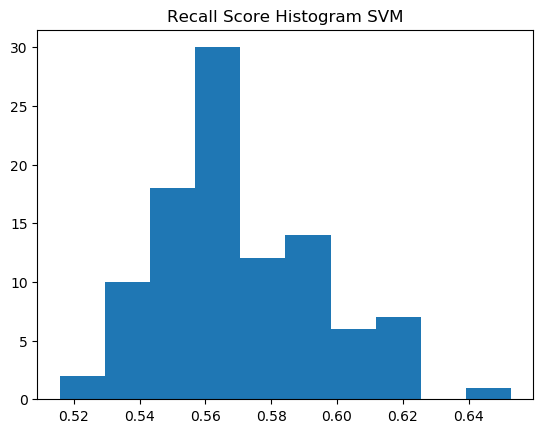

In [102]:

plt.hist(list_recall)
plt.title("Recall Score Histogram SVM")
plt.show()

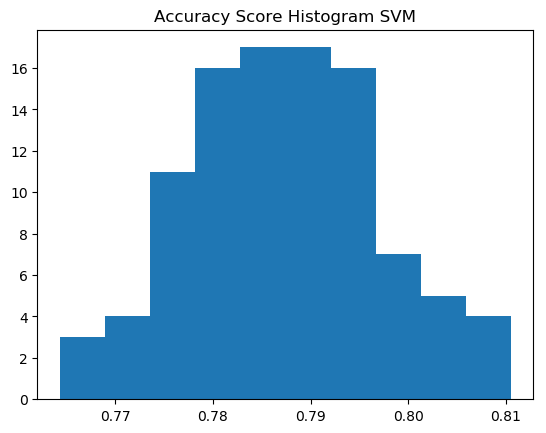

In [103]:
plt.hist(list_acc)
plt.title("Accuracy Score Histogram SVM")
plt.show()

In [78]:
from sklearn.ensemble import RandomForestClassifier
list_recall2 = []
list_acc2 = []
for i in range (0,100):
    y = data_dummies['Churn']
    X = data_dummies.drop(['Churn','customerID'], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)

    Tree = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False)
    Tree.fit(X_train, y_train)

    Tree_predictions_recall = Tree.predict(X_test)
    acc_score = accuracy_score(y_test, Tree_predictions_recall)
    recall_score2 = recall_score(y_test, Tree_predictions_recall)
    print ("trial"+str(i+1))
    print ("")
    print("accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, Tree_predictions_recall)))
    print("recall score on the testing data: {:.4f}".format(recall_score2))
    list_recall2.append(recall_score2)
    list_acc2.append(acc_score)

trial1

accuracy score on the testing data: 0.7828
recall score on the testing data: 0.5163
trial2

accuracy score on the testing data: 0.8155
recall score on the testing data: 0.5862
trial3

accuracy score on the testing data: 0.8070
recall score on the testing data: 0.5172
trial4

accuracy score on the testing data: 0.7949
recall score on the testing data: 0.4711
trial5

accuracy score on the testing data: 0.7864
recall score on the testing data: 0.5053
trial6

accuracy score on the testing data: 0.8027
recall score on the testing data: 0.5285
trial7

accuracy score on the testing data: 0.7935
recall score on the testing data: 0.5042
trial8

accuracy score on the testing data: 0.8062
recall score on the testing data: 0.5464
trial9

accuracy score on the testing data: 0.7913
recall score on the testing data: 0.5209
trial10

accuracy score on the testing data: 0.7878
recall score on the testing data: 0.5260
trial11

accuracy score on the testing data: 0.7921
recall score on the testing

trial90

accuracy score on the testing data: 0.8077
recall score on the testing data: 0.5014
trial91

accuracy score on the testing data: 0.8027
recall score on the testing data: 0.5319
trial92

accuracy score on the testing data: 0.7956
recall score on the testing data: 0.5307
trial93

accuracy score on the testing data: 0.8105
recall score on the testing data: 0.5679
trial94

accuracy score on the testing data: 0.7864
recall score on the testing data: 0.5066
trial95

accuracy score on the testing data: 0.7935
recall score on the testing data: 0.4878
trial96

accuracy score on the testing data: 0.7949
recall score on the testing data: 0.5424
trial97

accuracy score on the testing data: 0.7835
recall score on the testing data: 0.4737
trial98

accuracy score on the testing data: 0.7906
recall score on the testing data: 0.5128
trial99

accuracy score on the testing data: 0.8027
recall score on the testing data: 0.5409
trial100

accuracy score on the testing data: 0.7878
recall score on t

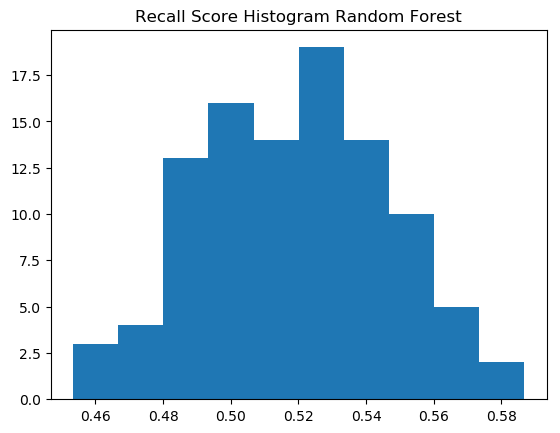

In [104]:

plt.hist(list_recall2)
plt.title("Recall Score Histogram Random Forest")
plt.show()

Ttest_1sampResult(statistic=-94.16321121321532, pvalue=1.0873970612872306e-98)


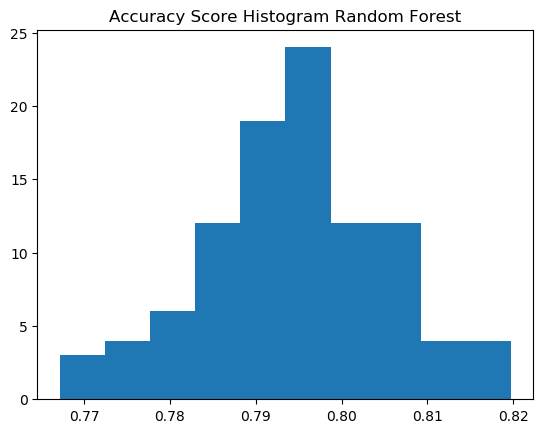

In [105]:
print (ttest_1samp(list_recall,0.8062))

plt.hist(list_acc2)
plt.title("Accuracy Score Histogram Random Forest")
plt.show()

In [101]:
from scipy.stats import ttest_ind
print (ttest_ind(np.asarray(list_recall), np.asarray(list_recall2)))
print (ttest_ind(np.asarray(list_acc), np.asarray(list_acc2)))

Ttest_indResult(statistic=13.49482420852048, pvalue=7.401479555314805e-30)
Ttest_indResult(statistic=-5.158599408125974, pvalue=6.01881657323168e-07)


### Justification
Benchmark result had 70% accuracy score and final model had about 10% higher accuracy score compared to benchmark model. In accuracy score, final model had better performance than benchmark model. It was impossible to compare recall score between benckmark model and final model as benchmark model didn't have recall score.However, if we are assuming if advertisement didn't cost much, then recall score would be important. For example, if we had 2,000 people who are planning to churn out, then 10 percent lower in recall score would mean failing to identifying 200 people. Considering that each customer pay about 2279.7 dollar in average, having 10 percent lower in recall score could cost about 455940 dollar. I have chosen final model considering those factors.  


## V. Conclusion

### Free-Form Visualization
Looking at the below plot, we can notice that there isn't much difference in accuracy score among 4 models. However, there is noticeable difference in recall score. For example, support vector machine optimized with recall score has about 10% higher recall score compared to other models. 

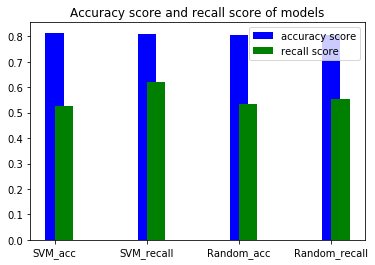

In [235]:
import matplotlib.pyplot as plt

x = ['SVM_acc', 'SVM_recall', 'Random_acc', 'Random_recall']

y = [accuracy_score(y_test, SVM_predictions), accuracy_score(y_test, SVM_predictions_recall), accuracy_score(y_test, Tree_predictions), accuracy_score(y_test, Tree_predictions_recall)]
z=[recall_score(y_test, SVM_predictions),recall_score(y_test, SVM_predictions_recall),recall_score(y_test, Tree_predictions), recall_score(y_test, Tree_predictions_recall)]

ax = plt.subplot(111)

plt.title("Accuracy score and recall score of models")
ax.bar(x, y,width=0.2,color='b',align='center',label="accuracy score")
ax.legend()
ax.bar(x, z,width=0.2,color='g',align='edge', label="recall score")
ax.legend()

plt.show()

### Reflection

#### Process:
1. Import data and identify problem
2. Identify metric and search benchmark model to solve the problem
3. Explore data
4. Preprocess data for training
5. Train data using gridsearch method
6. Compare models with different metric
7. Choose the best model. 

One of the difficult aspects of the project was preprocess data part as it was hard for me to find just empty value. I had to go through each cell to find it out. One of the interesting fact I found was that changing scoring method for grid search could dramtically change the outcome of the optimized models.

### Improvement
One of the improvement I could make is to consider different possible situation. I have only considered a situation that advertisement wouldn't cost much. However, if advertisement cost a lot than I should consider other metrics as precision and F1 score, which consider recall and precision score. Thus I will use F1 score as a scoring method for grid search instead of recall score. 